# K Means Clustering Implementation

We will use the algorithm from sklearn library and create a sample dataset using make_blobs and once the model is trained. We will calculate the silhoutte score and determine the best K value which can be chosen to obtain better results.

## Importing libraries

In [51]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

## Creating a sample dataset

In [62]:
X, y = make_blobs(n_samples=500, n_features=2, 
                  centers=4,random_state=40, 
                  cluster_std=1, shuffle=True, 
                  center_box=(-10.0, 10.0))

range_n_clusters = [2, 3, 4, 5, 6]

In [45]:
print(X)

[[-4.71020392e+00 -8.20020795e+00]
 [ 9.09620063e-01  2.07821975e+00]
 [-1.93633324e-01 -3.54159480e+00]
 [ 5.34072051e+00 -3.67907545e+00]
 [-1.58472286e-01 -9.93929274e+00]
 [ 6.34795813e-01  1.83019186e+00]
 [ 5.28509992e+00 -5.23361392e+00]
 [-1.51230477e+00 -4.46082901e+00]
 [-3.13948941e+00 -4.19950649e+00]
 [ 5.20824026e+00 -3.45763731e+00]
 [ 5.39621008e-01 -1.47985708e+00]
 [-1.23370044e-01 -9.11801924e-01]
 [-1.73176955e+00 -8.80461584e+00]
 [-4.01329531e-01 -3.63402692e+00]
 [ 2.05169811e-01  2.78428090e+00]
 [ 8.89556617e-01  3.06017396e+00]
 [ 1.96577667e+00  3.53701346e+00]
 [-1.69560530e+00 -3.64890201e+00]
 [ 5.89444501e+00 -5.91802700e+00]
 [-1.90632687e+00 -3.23134393e+00]
 [ 1.33551435e+00  1.91639986e+00]
 [-2.28444494e+00 -8.39923570e+00]
 [-6.36956422e-01 -8.22728331e+00]
 [-2.10354748e-01 -4.95533665e+00]
 [ 4.63596669e+00 -4.43849283e+00]
 [-2.37151709e+00 -6.44032540e+00]
 [-1.17604575e+00 -3.35975422e+00]
 [-7.74811539e-01 -8.47686119e+00]
 [-1.25797779e+00 -8

## Plotting the sample dataset using scatter plot

Text(0.5, 1.0, 'Sample Dataset')

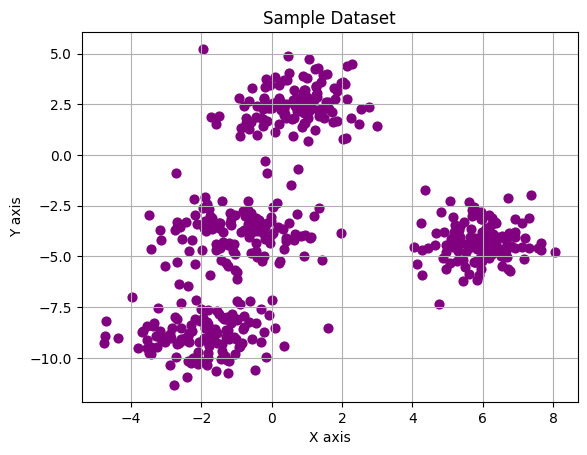

In [48]:
plt.scatter(x=X[:,0], y=X[:,1],s=40,c='purple')

plt.grid(True)
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.title("Sample Dataset")

## Clustering the dataset using K means clustering ranging from K = 1 - 11

In [61]:
wcss = [] # within cluster sum of squares for silhoutte score

for i in range(1, 11):

    # testing with different centroids or K values from 1 to 10
    # Kmeans++ ensures centroids are initialized far
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    # gives distance from centroid to all the other points
    wcss.append(kmeans.inertia_)


## Plotting Elbow curve to identify better K value

Text(0, 0.5, 'WCSS')

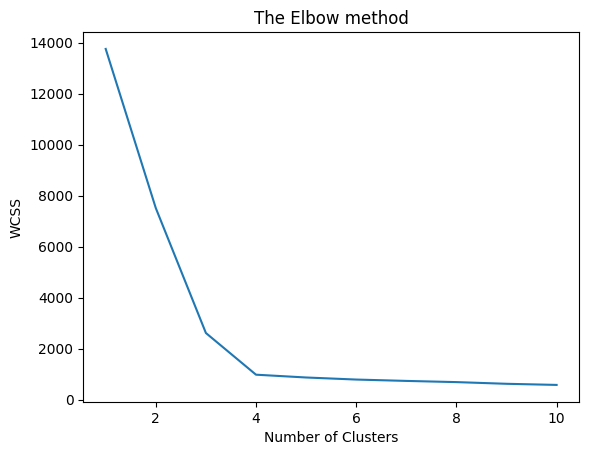

In [56]:
plt.plot(range(1,11), wcss)

plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

The curve looks like Elbow, and we can see at the point of 4, the curve got abruptly changed and from there it looks linear fashion. 

Hence, we will go with K = 4 value. But, lets also re-validate with the Silhoutte clustering whether the K value we chosen is correct or not.

In [58]:
cluster = KMeans(n_clusters=4, random_state=10)

# Remember fit() function is used to fit the model
# fit_predict() function is combination of fit() and predict() so it will cluster the data and also predict the labels.
# Instead of using this function, we can also obtain the lables after fitting by using kmeans_cluster.labels_ (Private variable)
cluster_labels = cluster.fit_predict(X) 

print(cluster_labels)

[0 3 1 2 0 3 2 1 1 2 1 1 0 1 3 3 3 1 2 1 3 0 0 1 2 0 1 0 0 0 1 3 0 2 0 3 0
 2 3 1 2 1 3 1 0 2 0 2 3 3 2 1 1 2 3 0 2 1 1 1 3 2 1 2 1 3 1 0 3 2 3 3 0 2
 0 1 1 2 2 2 1 0 1 3 3 3 2 3 1 3 0 0 2 2 0 3 2 1 0 2 3 1 1 3 3 1 0 3 1 2 1
 2 3 2 1 3 0 1 0 0 2 2 1 1 3 1 2 1 2 3 1 2 1 3 1 1 3 2 2 1 2 0 3 2 0 0 1 0
 0 0 0 2 1 3 3 0 2 0 1 1 0 3 3 0 2 1 2 0 3 3 3 1 3 3 1 1 1 1 3 3 3 0 1 3 2
 0 1 0 1 2 3 2 1 2 0 1 1 3 0 3 1 0 0 3 1 2 3 2 0 0 1 1 3 1 1 3 0 3 0 2 3 0
 2 1 3 1 3 1 2 1 1 1 3 3 1 0 2 1 3 2 1 0 0 0 3 0 0 2 1 3 2 0 3 2 3 2 1 3 2
 3 3 2 1 2 2 1 0 2 3 1 0 2 0 0 2 3 0 1 1 3 2 3 2 1 2 0 3 3 3 2 0 0 1 3 0 2
 1 2 0 0 3 2 2 3 3 2 1 0 2 1 1 0 0 2 2 2 0 0 3 3 1 2 2 2 2 0 2 2 1 0 3 2 2
 0 3 3 2 0 2 3 3 3 0 3 2 0 1 3 0 1 1 2 0 1 3 1 1 1 3 0 3 0 0 0 0 2 2 0 2 0
 2 0 1 1 3 1 2 3 0 2 1 2 1 1 0 0 3 1 0 1 2 1 1 0 0 1 3 1 2 2 0 3 2 1 3 0 2
 1 3 3 3 3 1 0 3 3 0 2 3 2 2 0 0 2 3 0 0 0 3 1 3 2 3 2 0 1 2 2 2 2 3 3 3 3
 1 2 0 1 2 0 3 2 3 3 3 3 3 2 2 0 0 0 0 0 2 2 1 3 1 0 0 0 3 3 2 1 0 0 1 1 0
 1 2 0 2 2 0 0 1 0 3 0 0 

## Validating model using Silhoutte clustering

We will calculate the silhoutte score for the clusters value we mentioned in `range_n_clusters` list using a loop. 

As we know earlier, the **Silhoutte score lies between -1 and 1. The higher the value the good the model works.**

Below code snippet is taken from Sklearn website for silhoutte score.

For n_clusters = 2 The average silhouette_score is : 0.4723547634938835
For n_clusters = 3 The average silhouette_score is : 0.6499925968666873
For n_clusters = 4 The average silhouette_score is : 0.6935026375545649
For n_clusters = 5 The average silhouette_score is : 0.5914661656334149
For n_clusters = 6 The average silhouette_score is : 0.5169859000905185


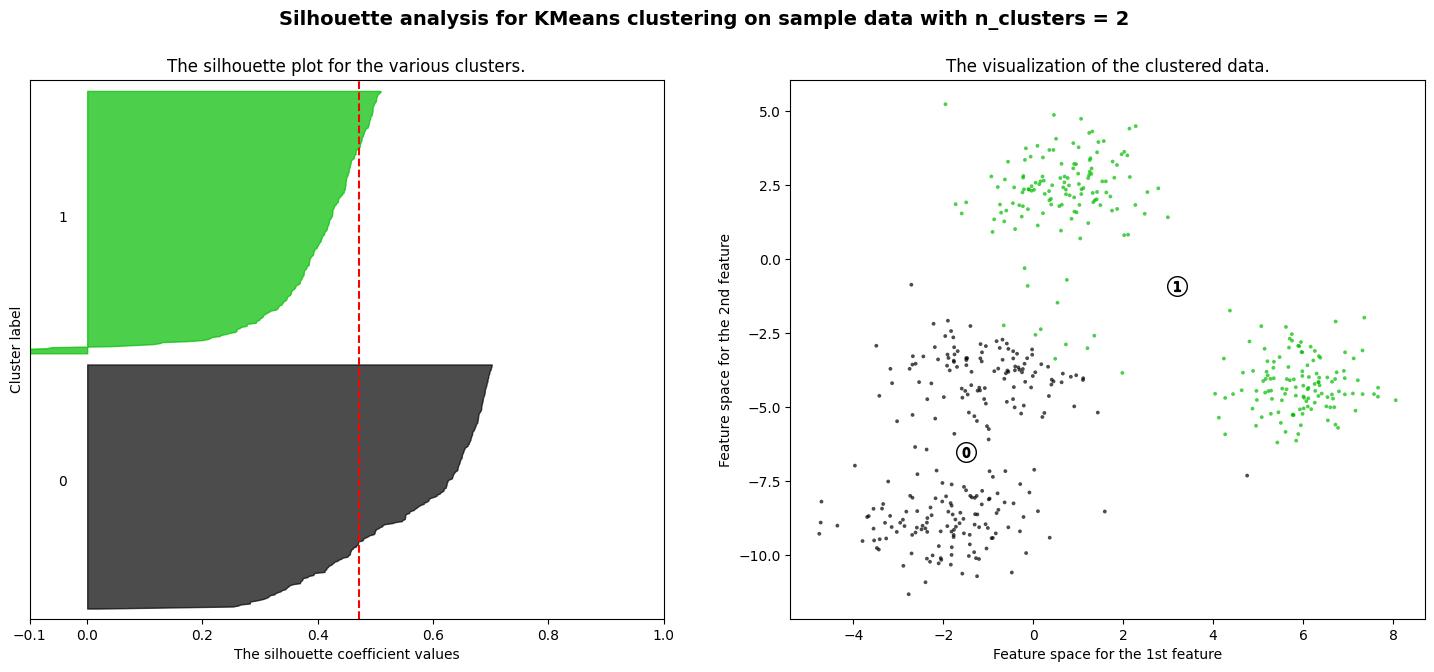

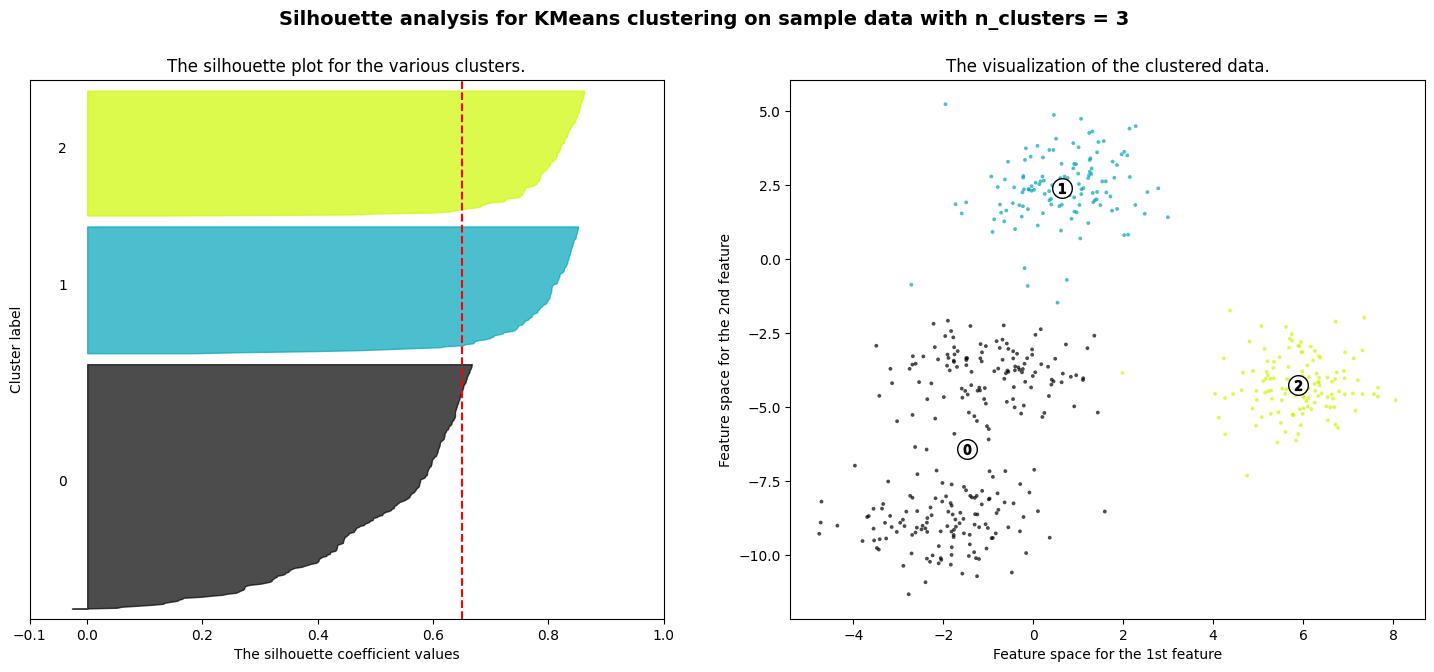

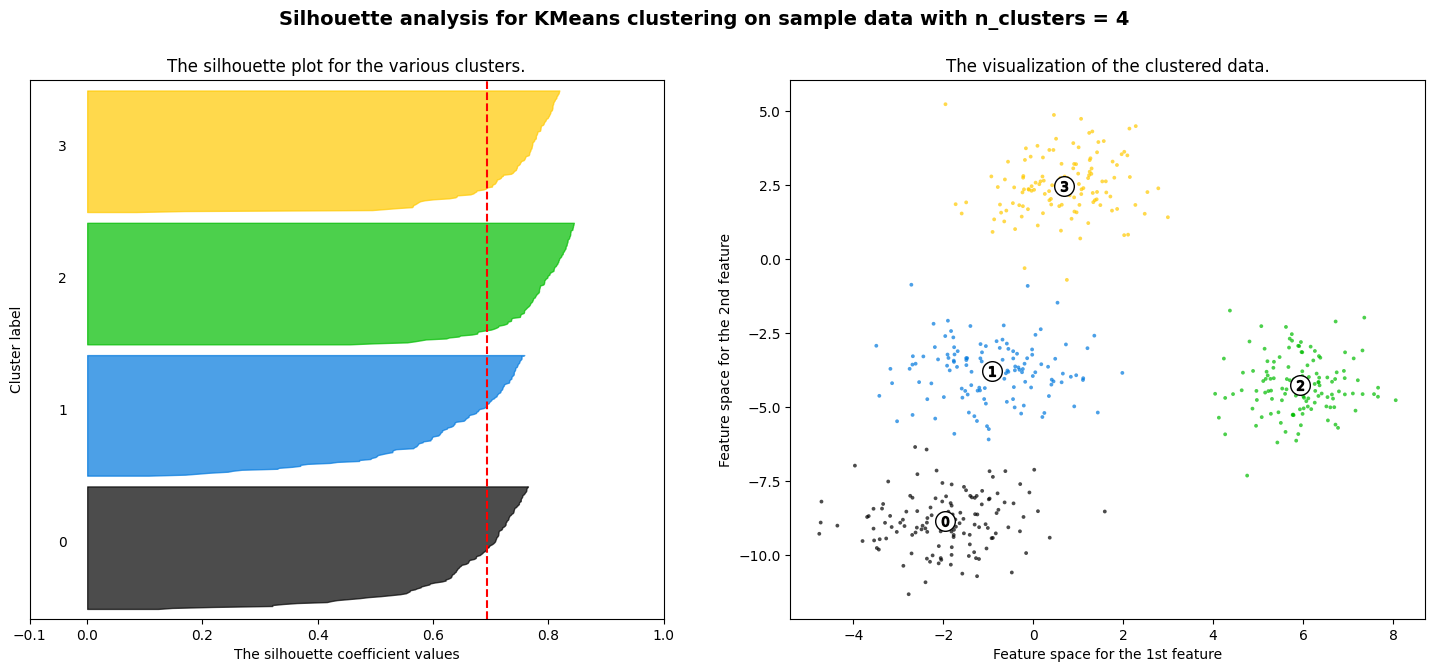

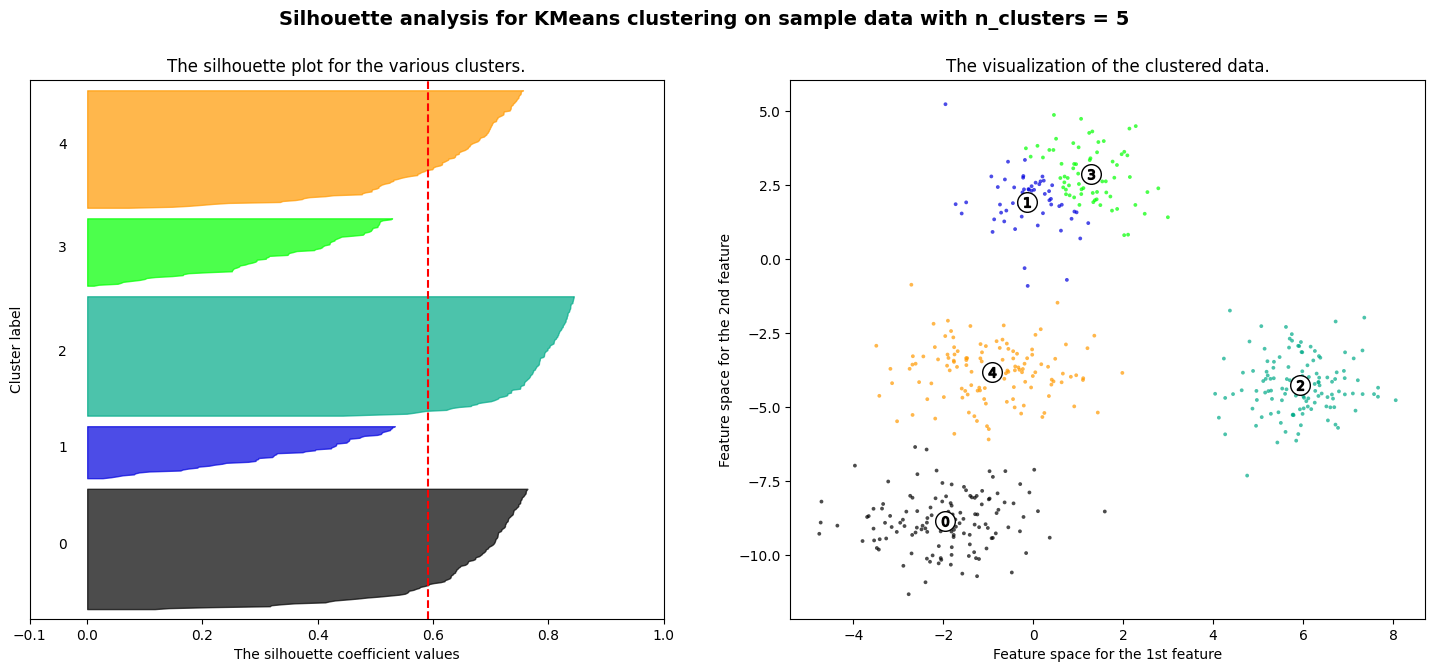

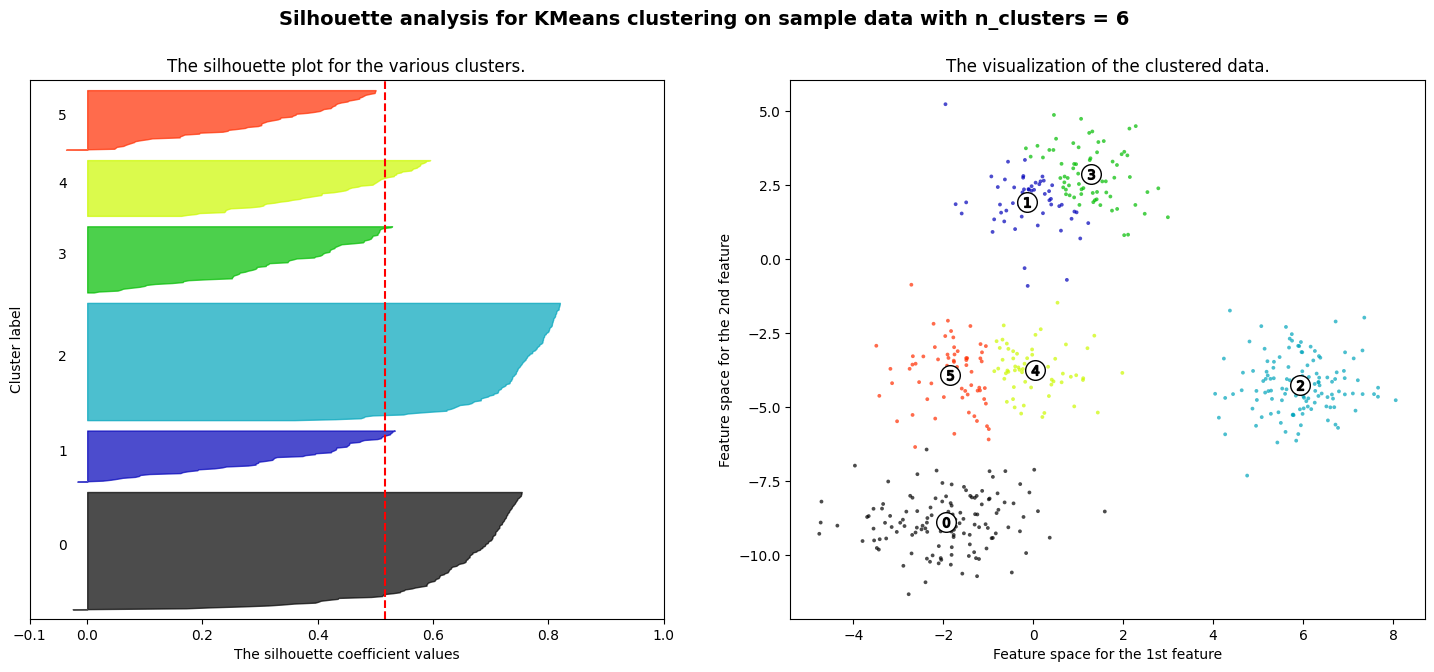

In [63]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

As per the above analysis, **we can see for K = 4, we dont see any negative values and silhoutte score is also high among them. Hence, we will go with the K = 4.**

Before from the elbow method we have identified the same, however we have cross-checked once again with Silhoutte score.